# IUI - Recommendation Systems - Collaborative Filtering
by Sven Mayer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download and extract dataset 
Source https://grouplens.org/datasets/movielens/

In [2]:
# Download
import urllib.request
url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
urllib.request.urlretrieve(url, './archive.zip')

# Extract 
import zipfile
with zipfile.ZipFile("./archive.zip","r") as zip_ref:
    zip_ref.extractall("")
    
import os
os.rename("ml-latest-small", "archive")

In [ ]:
! ls -la -h archive

In [4]:
dfRatings = pd.read_csv("./archive/ratings.csv")
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print("%i Ratings" % len(dfRatings))

100836 Ratings


In [6]:
print("%i Users" % len(dfRatings.userId.unique()))

610 Users


Text(0, 0.5, 'Count')

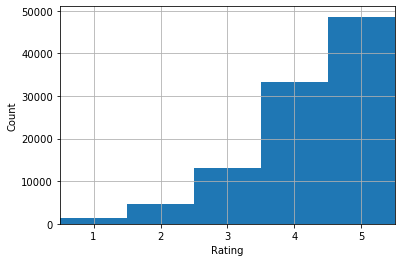

In [7]:
dfRatings.rating.hist(bins=5, range=(0,5))
plt.xticks(np.arange(0.5, 5.5), np.arange(1, 6))
plt.xlim(0,5)
plt.xlabel("Rating")
plt.ylabel("Count")

In [8]:
dfMovies = pd.read_csv("./archive/movies.csv")
print(len(dfMovies))
print("%i movies" % len(dfMovies))
dfMovies.head()

9742
9742 movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
dfTags = pd.read_csv("./archive/tags.csv")
dfTags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
print("%i tags by %i user" % (len(dfTags), len(dfTags.userId.unique())))

3683 tags by 58 user


In [11]:
# could be used as additional input for a recommender systems
dfTags.tag.value_counts().head(20)

In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
funny                  23
Disney                 23
surreal                23
religion               22
quirky                 21
psychology             21
dark comedy            21
sci-fi                 21
suspense               20
crime                  19
twist ending           19
visually appealing     19
politics               18
mental illness         16
music                  16
time travel            16
Name: tag, dtype: int64

## Merge dfMovies and dfRating so we know how they correlate

In [14]:
dfMovies2 = dfMovies.merge(dfRatings, on='movieId')
dfMovies2.tail()

# Similar to
# SQL Inner Join
# https://www.w3schools.com/sql/sql_join_inner.asp

,movieId,title,genres,userId,rating,timestamp
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100835,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


In [15]:
# Only to understand the dataset
dfMovies2.groupby('title')['rating'].count().reset_index().rename(columns={"rating":"count"}).sort_values("count", ascending=False).head(10)

,title,count
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
8001,Star Wars: Episode IV - A New Hope (1977),251
4662,Jurassic Park (1993),238
1337,Braveheart (1995),237
8363,Terminator 2: Judgment Day (1991),224
7421,Schindler's List (1993),220


## Build pivot table userId vs. title

In [17]:
dfPivot = dfMovies2.pivot_table(columns='userId', index='title', values='rating')
dfPivot = dfPivot.fillna(0)
dfPivot.T

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]Â² (2009),[REC]Â³ 3 GÃ©nesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),Â¡Three Amigos! (1986),Ã€ nous la libertÃ© (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# This table ist alomost empty!
userId = 150
print("User %i only rated %.2f%% of the movies" % (userId, len(dfPivot[userId][dfPivot[userId] != 0.0]) / len(dfPivot) * 100))

User 150 only rated 0.27% of the movies


## Show correlating movies
So if I like "Pulp Fiction (1994)" what will I likly also like?

In [23]:
selected_movie = dfPivot.loc["Bunny (1998)"]

# find correlation between X and rest


correlation = dfPivot.T.corrwith(selected_movie)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html

correlation = correlation.sort_values(ascending=False)
correlation.head(10)

title
Hommage Ã  Zgougou (et salut Ã  Sabine Mamou) (2002)    1.000000
Bunny (1998)                                          1.000000
John From (2015)                                      1.000000
Boundaries (2018)                                     1.000000
Jeff Ross Roasts the Border (2017)                    1.000000
Liquid Truth (2017)                                   1.000000
Tilt (2011)                                           1.000000
Spiral (2018)                                         1.000000
Black Mirror: White Christmas (2014)                  0.523008
Three Billboards Outside Ebbing, Missouri (2017)      0.369744
dtype: float64

In [25]:
selected_movie = dfPivot.loc["Seven (a.k.a. Se7en) (1995)"]

# find correlation between X and rest
correlation = dfPivot.T.corrwith(selected_movie)
correlation = correlation.sort_values(ascending=False)
correlation.head(10)

title
Seven (a.k.a. Se7en) (1995)                                       1.000000
Pulp Fiction (1994)                                               0.517086
Reservoir Dogs (1992)                                             0.450056
Silence of the Lambs, The (1991)                                  0.417446
LÃ©on: The Professional (a.k.a. The Professional) (LÃ©on) (1994)    0.412621
Trainspotting (1996)                                              0.407120
Natural Born Killers (1994)                                       0.397042
American History X (1998)                                         0.387274
Sin City (2005)                                                   0.382972
Usual Suspects, The (1995)                                        0.380085
dtype: float64

## Using a Nearest Neighbors approach 

In [26]:
import sklearn.neighbors
model = sklearn.neighbors.NearestNeighbors(n_neighbors=7, algorithm='brute', metric='cosine')

In [27]:
model.fit(dfPivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [29]:
movie = "Pulp Fiction (1994)"
distances, suggestions = model.kneighbors([dfPivot.loc[movie]])

## With table index
#list(zip(suggestions[0], np.round(distances[0], 4)))

## With movie names
list(zip(dfPivot.iloc[suggestions[0]].index.tolist(), np.round(distances[0], 4)))

[('Pulp Fiction (1994)', 0.0),
 ('Silence of the Lambs, The (1991)', 0.2906),
 ('Shawshank Redemption, The (1994)', 0.2976),
 ('Seven (a.k.a. Se7en) (1995)', 0.3023),
 ('Forrest Gump (1994)', 0.3145),
 ('Usual Suspects, The (1995)', 0.3274),
 ('Braveheart (1995)', 0.3724)]

In [30]:
dfSuggestedNeighbors  = dfPivot.iloc[suggestions[0]]

dfSuggestedNeighbors.loc[:, (dfSuggestedNeighbors != 0).any(axis=0)]

userId,1,2,4,5,6,7,8,10,11,13,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
Pulp Fiction (1994),3.0,0.0,1.0,5.0,2.0,0.0,4.0,1.0,0.0,0.0,...,0.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,4.0,5.0
"Silence of the Lambs, The (1991)",4.0,0.0,5.0,0.0,4.0,5.0,4.0,0.0,5.0,0.0,...,0.0,5.0,5.0,5.0,0.0,4.5,5.0,4.0,0.0,4.5
"Shawshank Redemption, The (1994)",0.0,3.0,0.0,3.0,5.0,0.0,5.0,0.0,4.0,0.0,...,5.0,5.0,0.0,0.0,0.0,3.5,5.0,4.5,4.0,3.0
Seven (a.k.a. Se7en) (1995),5.0,0.0,2.0,0.0,4.0,0.0,4.0,0.0,0.0,5.0,...,4.0,5.0,0.0,0.0,0.0,3.0,0.0,4.5,0.0,5.0
Forrest Gump (1994),4.0,0.0,0.0,0.0,5.0,5.0,3.0,3.5,5.0,0.0,...,0.0,3.0,3.0,0.0,3.0,4.0,0.0,3.0,4.0,3.0
"Usual Suspects, The (1995)",5.0,0.0,0.0,4.0,1.0,4.5,5.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,0.0,4.5,0.0,4.5,0.0,4.0
Braveheart (1995),4.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,5.0,0.0,...,0.0,5.0,1.0,3.0,3.0,3.5,5.0,4.0,3.0,4.5


## Finding similar users

In [31]:
import sklearn.neighbors
model = sklearn.neighbors.NearestNeighbors(n_neighbors=7, algorithm='brute', metric='cosine')

In [32]:
# training
model.fit(dfPivot.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

### getting k neighbors

In [33]:
userId = 8

In [34]:
dfPivot[userId]

title
'71 (2014)                                                                                  0.0
'Hellboy': The Seeds of Creation (2004)                                                     0.0
'Round Midnight (1986)                                                                      0.0
'Salem's Lot (2004)                                                                         0.0
'Til There Was You (1997)                                                                   0.0
'Tis the Season for Love (2015)                                                             0.0
'burbs, The (1989)                                                                          0.0
'night Mother (1986)                                                                        0.0
(500) Days of Summer (2009)                                                                 0.0
*batteries not included (1987)                                                              0.0
...All the Marbles (1981)         

In [35]:

distances, suggestions = model.kneighbors([dfPivot[userId]])

distances, suggestions

(array([[1.11022302e-16, 3.11157739e-01, 3.37653715e-01, 3.44610030e-01,
         3.52647023e-01, 3.63115256e-01, 3.77674398e-01]]),
 array([[  7, 378,  93, 511, 346, 445, 564]]))

In [36]:
dfSuggestedNeighbors  = dfPivot.T.iloc[suggestions[0]]

# Kick all the movies non of the neighboars has seen
dfSuggestedNeighbors = dfSuggestedNeighbors.loc[:, (dfSuggestedNeighbors != 0).any(axis=0)]
dfSuggestedNeighbors

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Aladdin (1992),"American President, The (1995)",Apollo 13 (1995),Babe (1995),Batman (1989),Batman Forever (1995),Beauty and the Beast (1991),...,To Die For (1995),Tombstone (1993),Toy Story (1995),True Lies (1994),True Romance (1993),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)",Waterworld (1995),What's Eating Gilbert Grape (1993),While You Were Sleeping (1995)
userId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,4.0,4.0,5.0,3.0,2.0,0.0,...,0.0,0.0,0.0,5.0,0.0,3.0,5.0,3.0,0.0,3.0
379,2.0,2.0,0.0,0.0,0.0,5.0,5.0,3.0,3.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0
94,3.0,2.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,0.0,...,0.0,0.0,0.0,3.0,0.0,5.0,0.0,2.0,3.0,0.0
512,2.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.0,3.0,0.0,3.0,0.0,5.0,5.0,3.0,3.0,0.0
347,3.0,4.0,0.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,...,0.0,0.0,5.0,3.0,0.0,3.0,0.0,3.0,0.0,4.0
446,0.0,0.0,0.0,3.0,4.0,3.0,5.0,3.0,1.0,4.0,...,3.0,0.0,0.0,2.0,3.0,4.0,4.0,2.0,5.0,3.0
565,3.0,3.0,0.0,3.0,0.0,3.0,4.0,2.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0


In [37]:
dfNotSeenByUser = dfSuggestedNeighbors.T[0.0 == dfSuggestedNeighbors.T[userId]].T

In [38]:
dfNotSeenByUser.mean().sort_values(ascending=False).head(10)

title
Die Hard: With a Vengeance (1995)    2.857143
Terminator 2: Judgment Day (1991)    2.714286
Aladdin (1992)                       2.428571
Stargate (1994)                      2.428571
Cliffhanger (1993)                   2.000000
Ace Ventura: Pet Detective (1994)    1.857143
Congo (1995)                         1.857143
Beauty and the Beast (1991)          1.714286
Crimson Tide (1995)                  1.714286
Quiz Show (1994)                     1.571429
dtype: float64

In [39]:
(dfNotSeenByUser.mean() * dfNotSeenByUser.replace({0:np.nan}).count()).sort_values(ascending=False).head(10)

title
Die Hard: With a Vengeance (1995)        17.142857
Terminator 2: Judgment Day (1991)        13.571429
Aladdin (1992)                           12.142857
Stargate (1994)                          12.142857
Cliffhanger (1993)                       10.000000
Ace Ventura: Pet Detective (1994)         9.285714
Congo (1995)                              7.428571
Ace Ventura: When Nature Calls (1995)     6.285714
Beauty and the Beast (1991)               5.142857
Crimson Tide (1995)                       5.142857
dtype: float64